In [2]:
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import metrics

In [3]:
df = pd.read_csv('data/train.csv').dropna()
df.drop(columns=['center_id', 'patient_id', 'image_num'], inplace=True)
df.head()

,image_id,label
0,006388_0,CE
1,008e5c_0,CE
2,00c058_0,LAA
3,01adc5_0,LAA
4,026c97_0,CE


In [4]:
CE_count = df.where(df['label'] == 'CE').count()[0]
CE_count

547

In [5]:
LAA_count = df.where(df['label'] == 'LAA').count()[0]
LAA_count

207

In [6]:
cutoff = CE_count if CE_count < LAA_count else LAA_count
cutoff

207

In [7]:
CE = df.where(df['label'] == 'CE').dropna().head(cutoff)
LAA = df.where(df['label'] == 'LAA').dropna().head(cutoff)

In [8]:
data = pd.concat([CE, LAA]).dropna()
data.head(cutoff*2)

,image_id,label
0,006388_0,CE
1,008e5c_0,CE
4,026c97_0,CE
6,029c68_0,CE
7,032f10_0,CE
...,...,...
740,fd684f_0,LAA
745,fde9ba_0,LAA
750,fe9bec_0,LAA
752,ffec5c_0,LAA


In [9]:
images = np.array([np.array(Image.open(f'jpgs/{img_id}.jpg')) for img_id in data['image_id']])
images.shape

(414, 512, 512)

In [10]:
enc_labels = np.zeros(shape=(414, 2))
for i, label in enumerate(data['label']):
    enc_labels[i][1 if label == 'CE' else 0] = 1

In [11]:
modelv1 = keras.models.load_model('convNN_save_at_25.h5') 
prediction = modelv1.predict(images)

13/13 [==============================] - 10s 385ms/step


In [12]:
predicted_labels=['CE' if np.argmax(i) == 1 else 'LAA' for i in prediction]

In [13]:
metrics.accuracy_score(y_true=data['label'], y_pred=predicted_labels)

0.8478260869565217

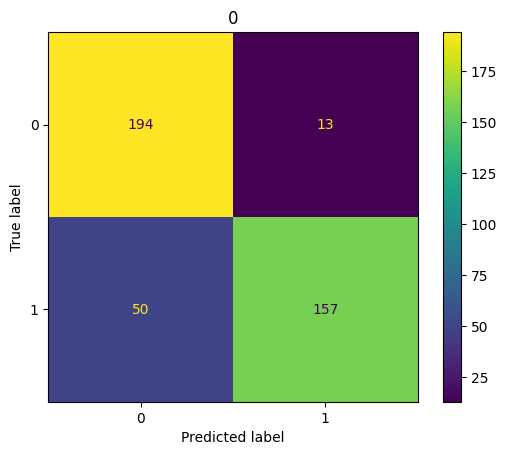

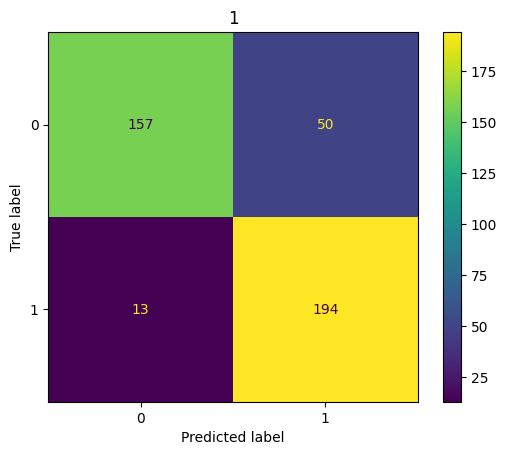

In [14]:
cf = metrics.multilabel_confusion_matrix(y_true=data['label'], y_pred=predicted_labels, labels=['CE', 'LAA'])
for i, v in enumerate(cf):
    disp = metrics.ConfusionMatrixDisplay(v).plot()
    plt.title(f'{i}')

In [19]:
modelv2 = keras.models.load_model('convNNv2_save_at_25.h5') 
prediction = modelv2.predict(images)

13/13 [==============================] - 6s 424ms/step


In [20]:
predicted_labels=['CE' if np.argmax(i) == 1 else 'LAA' for i in prediction]

In [21]:
metrics.accuracy_score(y_true=data['label'], y_pred=predicted_labels)

0.5

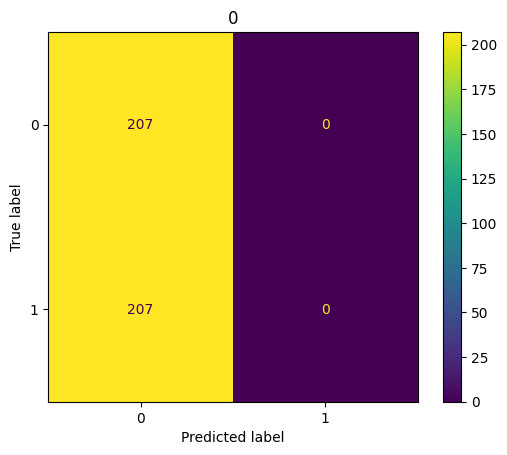

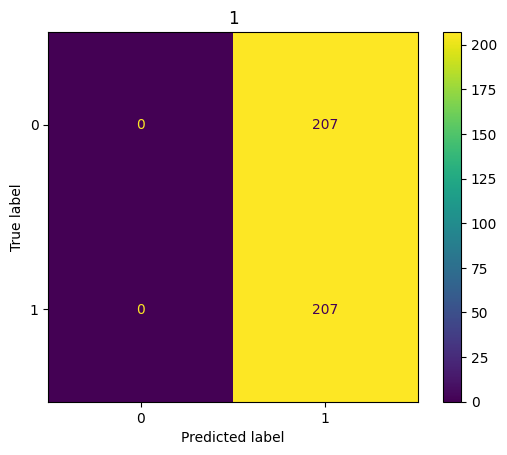

In [22]:
cf = metrics.multilabel_confusion_matrix(y_true=data['label'], y_pred=predicted_labels, labels=['CE', 'LAA'])
for i, v in enumerate(cf):
    disp = metrics.ConfusionMatrixDisplay(v).plot()
    plt.title(f'{i}')